In [47]:
import numpy as np


### Import the data

In [194]:
dataset = np.loadtxt('A_Z Handwritten Data.csv', delimiter=',')

In [214]:
dataset.shape

(372451, 785)

In [215]:
X = dataset[:,0:784]
Y = dataset[:,0] 

### Let's explore the data a bit. 

In [143]:
#This prints the count of each alphabet char. 0 is A and 25 is Z
unique, counts = np.unique(Y, return_counts=True)
frequencyCount = (np.asarray((unique, counts)).T)
frequencyCount

array([[0.0000e+00, 1.3870e+04],
       [1.0000e+00, 8.6680e+03],
       [2.0000e+00, 2.3409e+04],
       [3.0000e+00, 1.0134e+04],
       [4.0000e+00, 1.1440e+04],
       [5.0000e+00, 1.1630e+03],
       [6.0000e+00, 5.7620e+03],
       [7.0000e+00, 7.2180e+03],
       [8.0000e+00, 1.1200e+03],
       [9.0000e+00, 8.4930e+03],
       [1.0000e+01, 5.6030e+03],
       [1.1000e+01, 1.1586e+04],
       [1.2000e+01, 1.2336e+04],
       [1.3000e+01, 1.9010e+04],
       [1.4000e+01, 5.7825e+04],
       [1.5000e+01, 1.9341e+04],
       [1.6000e+01, 5.8120e+03],
       [1.7000e+01, 1.1566e+04],
       [1.8000e+01, 4.8419e+04],
       [1.9000e+01, 2.2495e+04],
       [2.0000e+01, 2.9008e+04],
       [2.1000e+01, 4.1820e+03],
       [2.2000e+01, 1.0784e+04],
       [2.3000e+01, 6.2720e+03],
       [2.4000e+01, 1.0859e+04],
       [2.5000e+01, 6.0760e+03]])

In [166]:
#The max of any letter is
most = frequencyCount.T[1].max()
for i in range(25):
  if(frequencyCount.T[1][i] == most):
    print("The most pictures of any letter is ")
    print("Letter " + str(int(frequencyCount.T[0][i])) + " with " + str(int(most)) + " pictures")
    

The most pictures of any letter is 
Letter 14 with 57825 pictures


That's a 'O'

In [169]:
#The min of any letter is
minimum = frequencyCount.T[1].min()
for i in range(25):
  if(frequencyCount.T[1][i] == minimum):
    print("The minimum pictures of any letter is ")
    print("Letter " + str(int(frequencyCount.T[0][i])) + " with " + str(int(minimum)) + " pictures")

The minimum pictures of any letter is 
Letter 8 with 1120 pictures


Thats a 'I'

Text(0.5, 1.0, 'Frequency Counts')

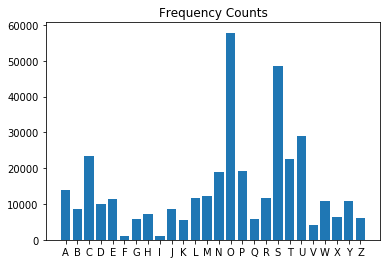

In [188]:
#Let's graph the distribution
%matplotlib inline
import matplotlib.pyplot as plt
import string
plt.bar(frequencyCount.T[0], frequencyCount.T[1], tick_label = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
plt.title("Frequency Counts")

Each picture is a 28 X 28 Image 

In [193]:
print("There are a total of "+ str(X.shape[0]) + " Total photographs")

There are a total of 372451 Total photographs


Let's look at what a picture looks like
 


In [197]:
X[0].shape

(784,)

The dimentions seem to be flattened so first let's reshape

In [208]:
tmpImg = X[0].reshape(28, 28, 1).astype('float32')
array_to_img(tmpImg)

In [51]:
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.25)

In [52]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [53]:
X_train[0].shape

(28, 28, 1)

In [54]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
X_train = X_train / 255
X_test = X_test / 255


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(26, activation='softmax'))

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
#train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3)

Train on 279338 samples, validate on 93113 samples
Epoch 1/3
279338/279338 [==============================] - 734s 3ms/step - loss: 0.1300 - acc: 0.9645 - val_loss: 0.0741 - val_acc: 0.9792
Epoch 2/3
279338/279338 [==============================] - 706s 3ms/step - loss: 0.0486 - acc: 0.9868 - val_loss: 0.0508 - val_acc: 0.9863
Epoch 3/3
279338/279338 [==============================] - 688s 2ms/step - loss: 0.0268 - acc: 0.9925 - val_loss: 0.0417 - val_acc: 0.9898


### Let's see what the output for a prediction looks like

In [64]:
from keras.preprocessing.image import img_to_array, array_to_img
array_to_img(X_test[0])

In [66]:
images = np.array([X_test[0]])
model.predict(images)

array([[4.48346292e-16, 1.81343418e-14, 2.99864337e-06, 4.40904332e-14,
        3.78592879e-10, 1.66620020e-14, 9.00878206e-07, 3.35664452e-09,
        3.35903939e-13, 1.14073737e-08, 1.07443412e-07, 2.12866114e-10,
        3.38315487e-11, 1.12454476e-10, 6.36635775e-08, 1.97787090e-16,
        5.30658095e-09, 1.48922199e-15, 2.77008250e-10, 3.98270148e-13,
        9.99995589e-01, 2.04109537e-12, 3.71573265e-07, 3.04481163e-11,
        1.11354681e-09, 1.48655888e-09]], dtype=float32)

In [209]:
from keras.preprocessing.image import img_to_array, array_to_img
#pic = Image.open("C-33.png")
pic = Image.open("test2.png")
pic = pic.resize((28,28))
img = img_to_array(pic)
img.shape


img = color.rgb2gray(img)

In [210]:
img.shape

(28, 28)

In [211]:
images = np.array([img])
images = images.reshape(1, 28, 28, 1).astype('float32')
images.shape

(1, 28, 28, 1)

In [212]:
model.predict(images)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [213]:
array_to_img(images[0])